# Tensor cross interpolation to fRG data. Scale-factorization (quantic) idea.

## Read a sample

In [1]:
import numpy as np
import matplotlib.pyplot as plt
dir="data/0deg_1loop_flow_uniform/lambda_0.2/vertex_uniform_"
grid_b=np.load(f'{dir}K1t1_frequency_grid_bose.npy')
K=np.load(f'{dir}K1t0.npy')
[K.shape, grid_b.shape]

[(4096, 73), (4096,)]

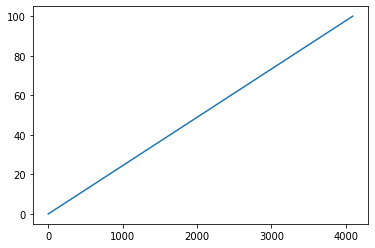

In [2]:
plt.plot(grid_b)

## Import the xfac lib to do tci

In [2]:
import sys
import numpy as np
sys.path.append("../xfac/build/python")  # set to correct path for module
import xfacpy

## 1D case

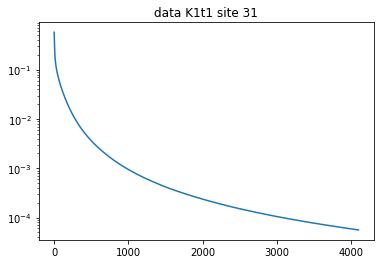

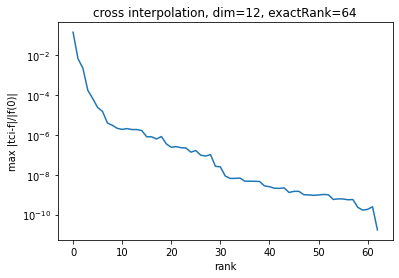

In [3]:
name='K1t1'
site=31
K=np.load(f'{dir}{name}.npy')
#print(f'argmax={K.argmax()} max={K.max()}')
data=K[:,site]

plt.plot(np.abs(data))
plt.yscale('log')
plt.title(f'data {name} site {site}')
plt.show()

def myTf(id):
    i=int("".join(str(i) for i in id),2)
    return data[i]
dim=int( np.log2(len(data)) )
p=xfacpy.TensorCIParam()
p.pivot1=[0]*dim
ref=np.abs(myTf(p.pivot1))
ci=xfacpy.TensorCI(myTf, 2, dim, p)
rs, error=[], []
for i in range(2**(dim//2)):
    ci.iterate()    
    rs += [max(ci.rank())]
    error += [ci.trueError()/ref]
    if error[-1]<1e-10: break

plt.plot(error)
plt.yscale('log')
plt.title(f'cross interpolation, dim={dim}, exactRank={2**(dim//2)}')
plt.xlabel('rank')
plt.ylabel('max |tci-f|/|f(0)|')
plt.show()

## 2D case

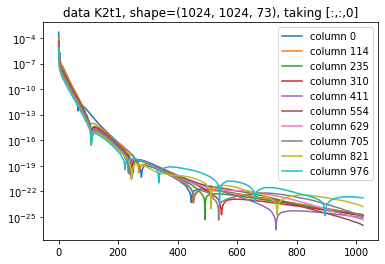

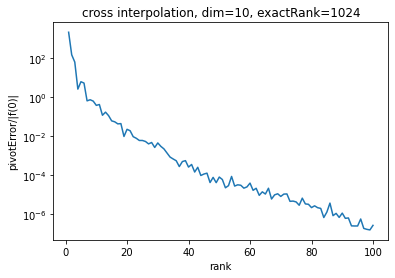

In [4]:
name='K2t1'
site=0
cols=[0,114,235,310,411,554,629,705,821,976]
K=np.load(f'{dir}{name}.npy')
#print(f'argmax={K.argmax()} max={K.max()}')
data=K[:,:,site]

for col in cols:
    plt.plot(np.abs(data[:,col]), label=f'column {col}')
plt.yscale('log')
plt.title(f'data {name}, shape={K.shape}, taking [:,:,{site}]')
plt.legend()
plt.show()

def myTf(id):
    i=int("".join(str(i//2) for i in id),2)
    j=int("".join(str(i%2) for i in id),2)
    return data[i,j]
dim=int( np.log2(len(data)) )
p=xfacpy.TensorCIParam()
p.pivot1=[0]*dim
ref=np.abs(myTf(p.pivot1))
ci=xfacpy.TensorCI(myTf, 4, dim, p)
rs, error=[], []
for i in range(min(100, 4**(dim//2))):
    ci.iterate()    
    rs += [max(ci.rank())]
    error += [ci.pivotError()/ref]
    if error[-1]<1e-12: break
    if len(rs)>2 and rs[-1]==rs[-2]: break

plt.plot(rs,error)
plt.yscale('log')
plt.title(f'cross interpolation, dim={dim}, exactRank={4**(dim//2)}')
plt.xlabel('rank')
plt.ylabel('pivotError/|f(0)|')
plt.show()